# Predict Game Output in League Of Legends
---
**Por: Ian Joab Padron Corona - A01708940**

## Librerias

In [54]:
'''
===============================================================================
Librerias de Python a utilizar en el proyecto
===============================================================================
pandas: Libreria de manipulacion de datos en DataFrames
numpy: Libreria para operaciones matematicas y manipulacion de arreglos
seaborn: Libreria para visualizacion de datos
matplotlib: Libreria para graficar
tensorflow: Libreria de aprendizaje profundo
keras: API de alto nivel para crear redes neuronales
Sequential: API para crear modelos de redes neuronales
Dense: Capa densa (fully connected)
OneHotEncoder: Convertir variables categoricas en numericas creando columnas binarias. ESTE SOLO PARA EL DE TETRIS
MinMaxScaler: Normaliza los datos entre 0 y 1
train_test_split: Divide los datos en conjuntos de entrenamiento y prueba
classification_report: Genera un informe de clasificacion
confusion_matrix: Crea una matriz de confusiones
===============================================================================
'''

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

## Datos

In [55]:
data = pd.read_csv('../content/high_diamond_ranked_10min.csv', low_memory=False)
data.drop(columns=['gameId'], inplace=True)

In [56]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   blueWins                      9879 non-null   int64  
 1   blueWardsPlaced               9879 non-null   int64  
 2   blueWardsDestroyed            9879 non-null   int64  
 3   blueFirstBlood                9879 non-null   int64  
 4   blueKills                     9879 non-null   int64  
 5   blueDeaths                    9879 non-null   int64  
 6   blueAssists                   9879 non-null   int64  
 7   blueEliteMonsters             9879 non-null   int64  
 8   blueDragons                   9879 non-null   int64  
 9   blueHeralds                   9879 non-null   int64  
 10  blueTowersDestroyed           9879 non-null   int64  
 11  blueTotalGold                 9879 non-null   int64  
 12  blueAvgLevel                  9879 non-null   float64
 13  blu

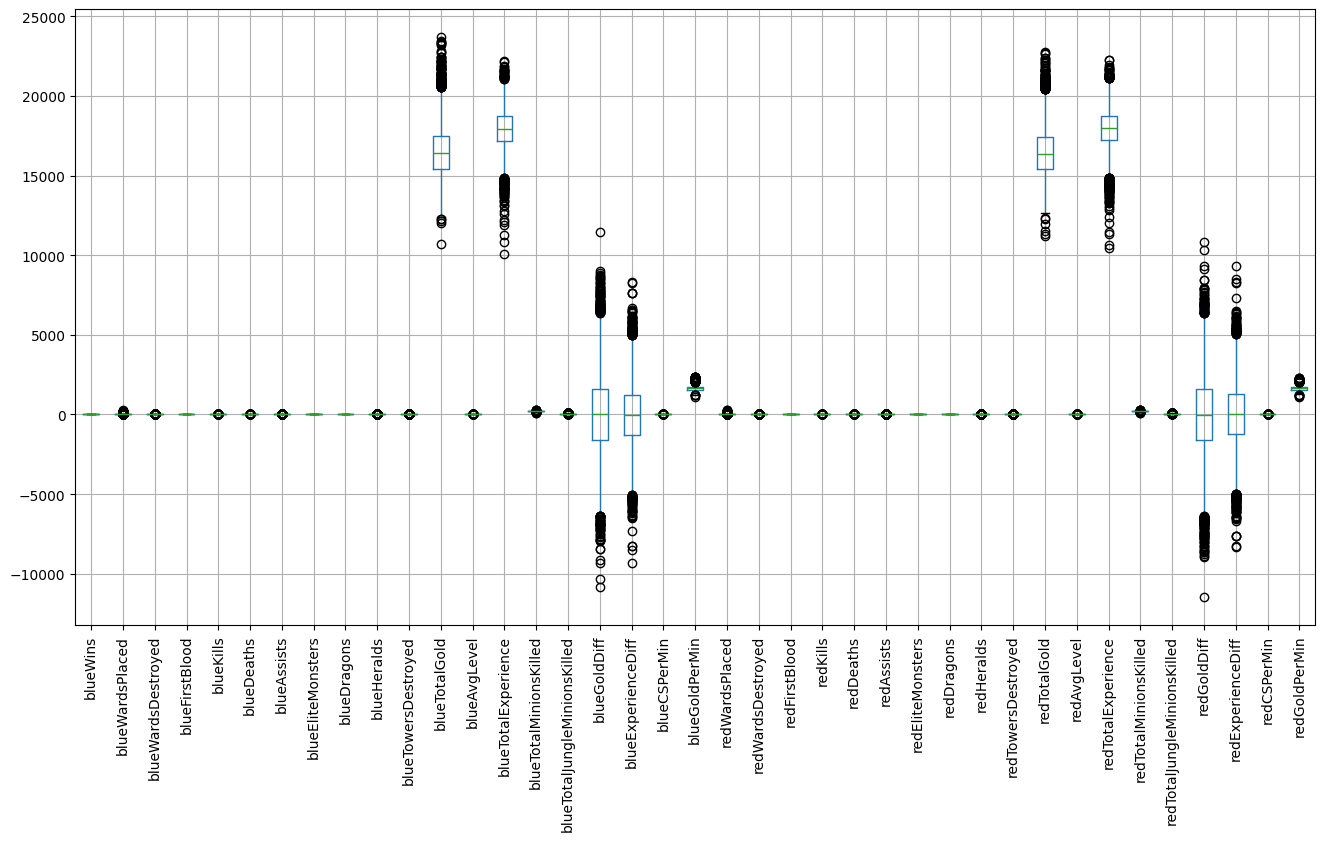

In [57]:
data.boxplot(figsize = (16, 8))
plt.xticks(rotation=90)
plt.show()

## Escalamiento

In [58]:
scaler = MinMaxScaler()

# Escalamiento de las columnas con valores muy grandes
columns_to_scale = ['blueTotalGold', 'blueTotalExperience', 'blueGoldDiff', 'blueExperienceDiff', 'blueGoldPerMin',
                    'redTotalGold', 'redTotalExperience', 'redGoldDiff', 'redExperienceDiff', 'redGoldPerMin']
data_scaled = data.copy()
data_scaled[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

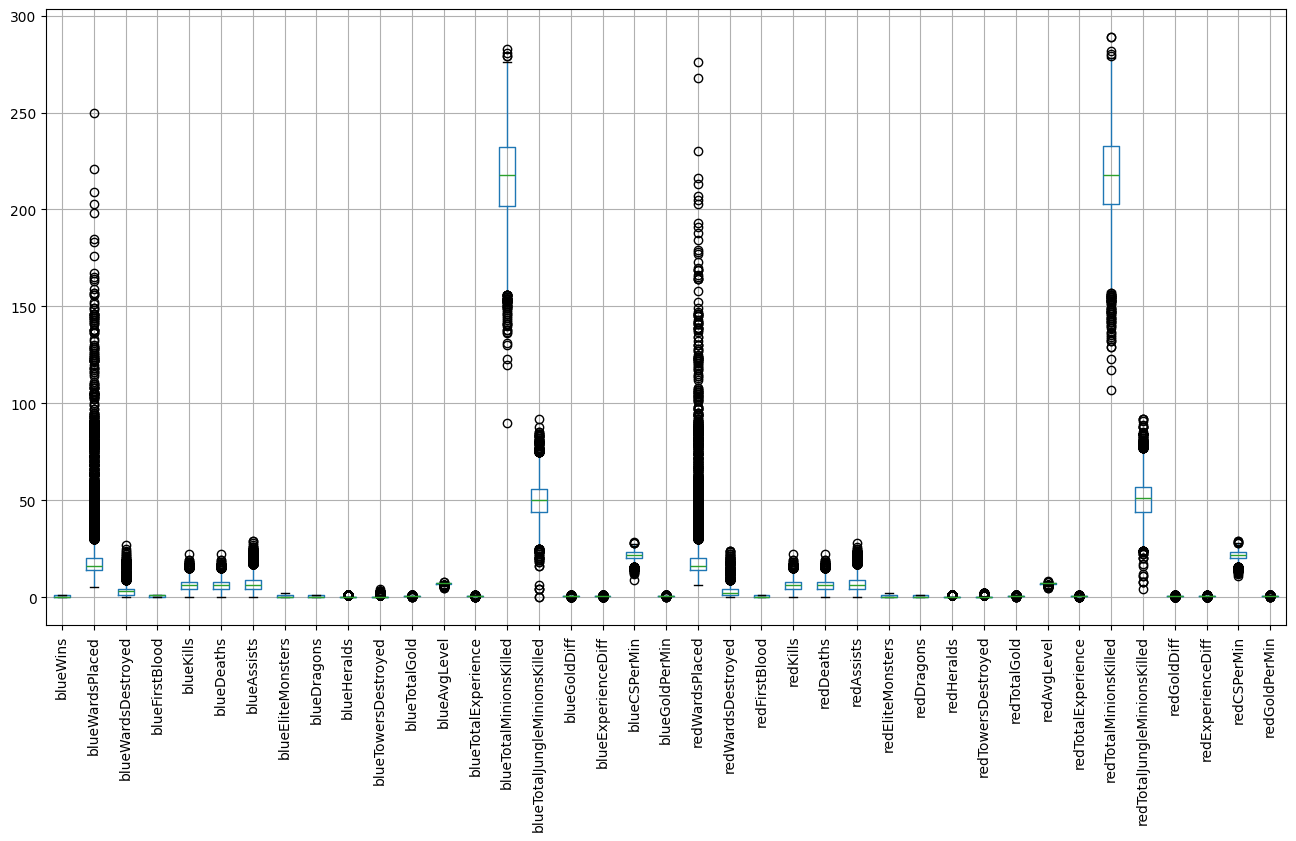

In [59]:
data_scaled.boxplot(figsize = (16, 8))
plt.xticks(rotation=90)
plt.show()

## Separacion

In [60]:
# Asignar las 'features; X' y la 'target variable; y'
X = data_scaled.drop(columns=['blueWins'])
y = data_scaled['blueWins']

# Dividir los datos en en train y test
X_train, X_test, y_train, y_test = train_test_split(
                                                    X,
                                                    y,
                                                    train_size   = 0.80,
                                                    random_state = 42,
                                                    shuffle      = True
                                                    )

## Modelo

### Classifier

In [61]:
def model_simple(shape):
    """
    This is a simple model multilayer perceptron or neural network.
    Your function should return the model.
    """
    model  =  Sequential([
                    Dense(128, activation='relu', input_shape=shape),
                    Dense(128, activation='relu'),
                    Dense(1, activation='sigmoid')
            ])
    return model

In [62]:
def compile_model_simple(model):
    """
    This function takes in the model returned from your get_model function, and compiles it with an optimiser,
    loss function and metric.
    Compile the model using the Adam optimiser (with default settings), the cross-entropy loss function and
    accuracy as the only metric.
    Your function doesn't need to return anything; the model will be compiled in-place.
    """
    model.compile(optimizer= "adam",
                  loss = "binary_crossentropy",
                  metrics=['accuracy'])

In [63]:
def train_model_simple(model, train_features, train_labels):
    """
    Train the model on the scaled_train_images and train_labels.
    Your function should return the training history, as returned by model.fit.
    """
    return model.fit(train_features, train_labels, epochs = 32)

In [64]:
model_nn = model_simple(X_train.shape[1:])
model_nn.summary()

/home/user326/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │         4,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,633 (84.50 KB)

 Trainable params: 21,633 (84.50 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
compile_model_simple(model_nn)

In [66]:
history_nn = train_model_simple(model_nn, X_train, y_train)

Epoch 1/32


247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5958 - loss: 1.8468
Epoch 2/32
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6675 - loss: 0.7193
Epoch 3/32
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6587 - loss: 0.6974
Epoch 4/32
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6561 - loss: 0.7389
Epoch 5/32
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6894 - loss: 0.6277
Epoch 6/32
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6817 - loss: 0.6524
Epoch 7/32
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6686 - loss: 0.6528
Epoch 8/32
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6928 - loss: 0.6142
Epoch 9/32
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6934 - loss: 0.6179
Epoch 10/32
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6921 - loss: 0.6009
Epoch 11/32
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6955 - loss: 0.5820
Epoch 12/32
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy

### Plot accuracy

In [67]:
frame = pd.DataFrame(history_nn.history)

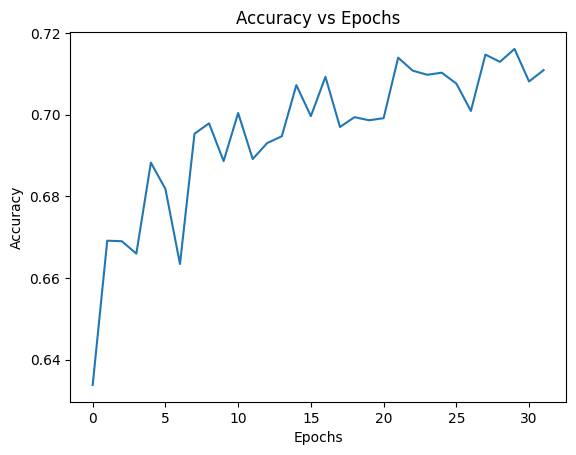

In [68]:
# Run this cell to make the Accuracy vs Epochs plot

acc_plot = frame.plot(y="accuracy", title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")
plt.show()

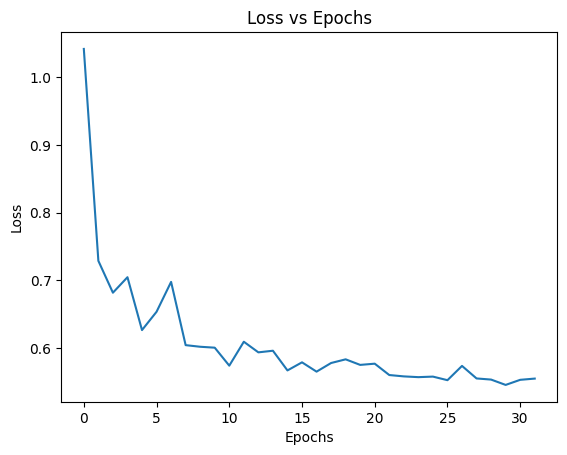

In [69]:
# Run this cell to make the Loss vs Epochs plot

acc_plot = frame.plot(y="loss", title = "Loss vs Epochs",legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Loss")
plt.show()

### Evaluacion

In [70]:
def evaluate_model(model, test_features, test_labels):
    """
    This function should evaluate the model on the scaled_test_images and test_labels.
    Your function should return a tuple (test_loss, test_accuracy).
    """
    test_loss, test_accuracy = model.evaluate(test_features, test_labels)
    return (test_loss, test_accuracy)

In [71]:
# Run your function to evaluate the model Neural Network Dense Layers

test_loss, test_accuracy = evaluate_model(model_nn, X_test, y_test)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7317 - loss: 0.5412
Test loss: 0.5380
Test accuracy: 0.7399


In [72]:
# Predicciones y métricas
preds = model_nn.predict(X_test)
y_pred = (preds > 0.5).astype(int).flatten()
y_true = y_test.values.flatten()
class_labels = ['blueWins', 'redWins']

print("\n Reporte de clasificación:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

 Reporte de clasificación:

              precision    recall  f1-score   support

    blueWins       0.74      0.73      0.74       983
     redWins       0.74      0.75      0.74       993

    accuracy                           0.74      1976
   macro avg       0.74      0.74      0.74      1976
weighted avg       0.74      0.74      0.74      1976



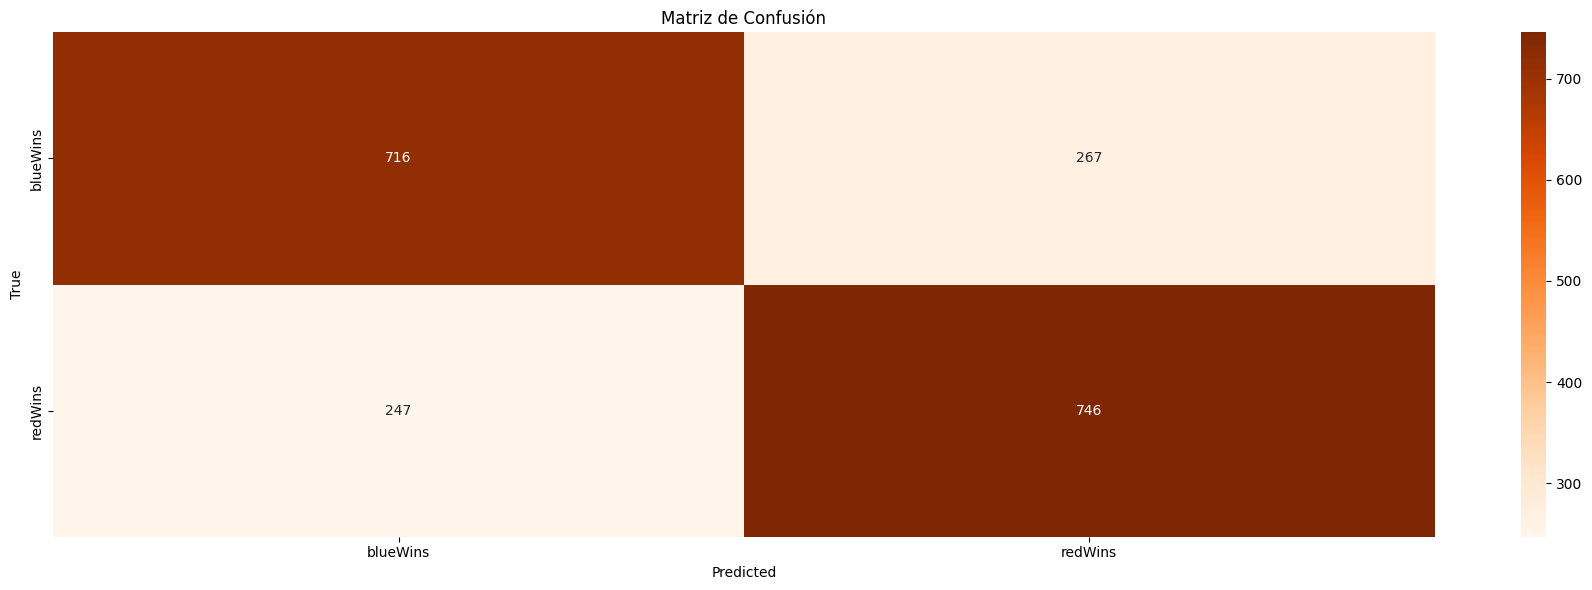

In [73]:
# Matriz de confusión
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(18, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusión')
plt.tight_layout()
plt.show()